In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import random


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression-dataset/Linear Regression - Sheet1.csv


In [4]:
data=pd.read_csv("../input/linear-regression-dataset/Linear Regression - Sheet1.csv")

In [5]:
data.sample(10)

,X,Y
224,225,153.222222
193,194,132.555556
252,253,171.888889
222,223,151.888889
218,219,149.222222
28,29,22.555556
39,40,29.888889
124,125,86.555556
117,118,81.888889
53,54,39.222222


In [6]:
data.shape
data.info

<bound method DataFrame.info of        X           Y
0      1    3.888889
1      2    4.555556
2      3    5.222222
3      4    5.888889
4      5    6.555556
..   ...         ...
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889

[300 rows x 2 columns]>

In [7]:
data.isnull

<bound method DataFrame.isnull of        X           Y
0      1    3.888889
1      2    4.555556
2      3    5.222222
3      4    5.888889
4      5    6.555556
..   ...         ...
295  296  200.555556
296  297  201.222222
297  298  201.888889
298  299    1.888889
299  300    1.888889

[300 rows x 2 columns]>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

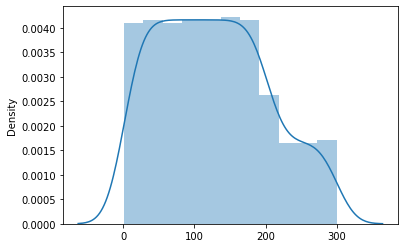

In [8]:
sns.distplot(data)


In [12]:
data.columns

Index(['X', 'Y'], dtype='object')

In [48]:
print(data.Y[:])

0        3.888889
1        4.555556
2        5.222222
3        5.888889
4        6.555556
          ...    
295    200.555556
296    201.222222
297    201.888889
298      1.888889
299      1.888889
Name: Y, Length: 300, dtype: float64


In [59]:
X_train=data.X[:298]
y_train=random.sample(list(data.Y[:298]), 298)



In [69]:
print(X_train)


0        1
1        2
2        3
3        4
4        5
      ... 
293    294
294    295
295    296
296    297
297    298
Name: X, Length: 298, dtype: int64


AttributeError: 'Series' object has no attribute 'type'

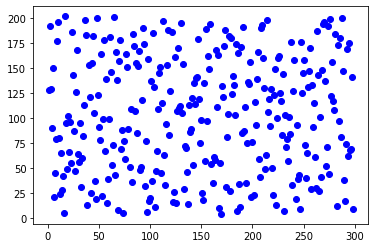

In [167]:
plt.figure()
plt.scatter(X_train,y_train,c="blue",marker='o')
plt.show()

In [102]:
def cost_function(X,y,w,b):
    m=X.shape[0]
    cost=0
    for i in range (m):
        f_wb=w*X[i]+b
        cost+=(f_wb-y[i])**2
    cost=cost/(2*m)
    return cost
w=1
b=0.0001
X_train=np.array(X_train)
y_train=np.array(y_train)
print(cost_function(X_train,y_train,w,b))

6238.402891995349


plot la courbe d'un exemple quelconque de w et de b

298 298


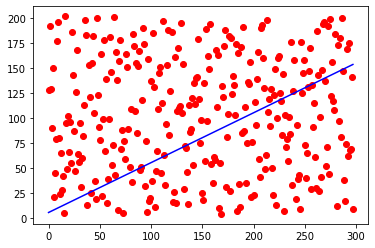

In [150]:
h=0.4993*X_train+4.807
e=np.linspace(0,297,298)
print(y_train.size,e.size)
plt.scatter(e,y_train,c="red",marker='o')
plt.plot(e,h,c="blue")


In [91]:
print(len(X_train),len(h),len(y_train))

298 298 298


In [125]:
def compute_gradient(X,y,w,b):
    dj_dw=0
    dj_db=0
    m=X.shape[0]
    for i in range(m):
        f_wb=w*X[i]+b
        dj_dw+=(f_wb-y[i])*X[i]
        dj_db+=(f_wb-y[i])
    dj_db=dj_db/m
    dj_dw=dj_dw/m
    return dj_dw,dj_db
    

In [146]:
import math
def gradient_descent(X,y,w0,b0,alpha,numiter,cost_function,compute_gradient):
    m=X.shape[0]
    J_history=[]
    P_history=[]
    b=b0
    w=w0
    for i in range(numiter):
        dj_dw,dj_db=compute_gradient(X,y,w,b)
        b=b-alpha*dj_db
        w=w-alpha*dj_dw
        if i<100000:
            J_history.append(cost_function(X,y,w,b))
            P_history.append([w,b])
        if i% math.ceil(numiter/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,J_history,P_history
    

In [151]:
alpha=0.0000002
numiter=10000
w0=0
b0=0
w,b,J_history,P_history=gradient_descent(X_train,y_train,w0,b0,alpha,numiter,cost_function,compute_gradient)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

Iteration    0: Cost 6.89e+03  dj_dw: -1.557e+04, dj_db: -1.029e+02   w:  3.115e-03, b: 2.05778e-05
Iteration 1000: Cost 2.86e+03  dj_dw: -3.974e+01, dj_db: -2.482e+01   w:  5.221e-01, b: 7.55359e-03
Iteration 2000: Cost 2.86e+03  dj_dw:  2.172e-02, dj_db: -2.462e+01   w:  5.234e-01, b: 1.24847e-02
Iteration 3000: Cost 2.86e+03  dj_dw:  1.235e-01, dj_db: -2.462e+01   w:  5.234e-01, b: 1.74090e-02
Iteration 4000: Cost 2.86e+03  dj_dw:  1.237e-01, dj_db: -2.462e+01   w:  5.234e-01, b: 2.23330e-02
Iteration 5000: Cost 2.86e+03  dj_dw:  1.237e-01, dj_db: -2.462e+01   w:  5.234e-01, b: 2.72567e-02
Iteration 6000: Cost 2.86e+03  dj_dw:  1.237e-01, dj_db: -2.462e+01   w:  5.233e-01, b: 3.21802e-02
Iteration 7000: Cost 2.86e+03  dj_dw:  1.237e-01, dj_db: -2.462e+01   w:  5.233e-01, b: 3.71035e-02
Iteration 8000: Cost 2.86e+03  dj_dw:  1.237e-01, dj_db: -2.461e+01   w:  5.233e-01, b: 4.20265e-02
Iteration 9000: Cost 2.86e+03  dj_dw:  1.237e-01, dj_db: -2.461e+01   w:  5.233e-01, b: 4.69492e-02


298 298


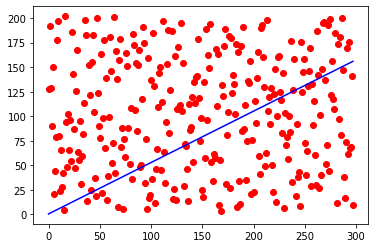

In [168]:
h=0.5232*X_train+0.0519
e=np.linspace(0,297,298)
print(y_train.size,e.size)
plt.scatter(e,y_train,c="red",marker='o')
plt.plot(e,h,c="blue")

In [153]:
len(J_history)

10000

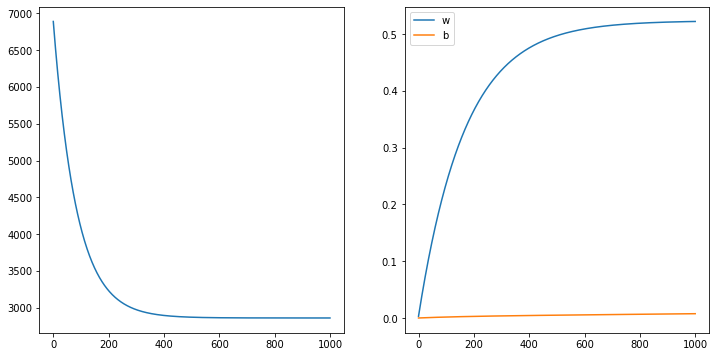

In [170]:
c=np.linspace(0,999,1000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(c,J_history[:1000],label="cost")
plt.legend(loc="upper right")
ax2.plot(c,P_history[:1000],label=["w","b"])

plt.legend(loc="upper left")